# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [13]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
fraud.shape

(1000000, 8)

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [7]:
fraud['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

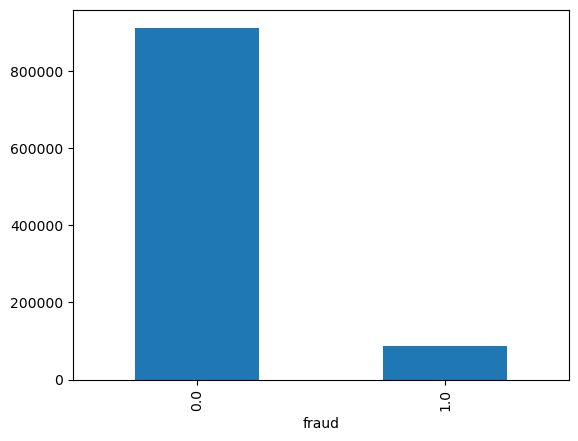

In [8]:
survived = fraud["fraud"].value_counts()
survived.plot(kind="bar")
plt.show()

In [9]:
features = fraud.drop('fraud', axis=1)
target = fraud['fraud']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg.score(X_test_scaled, y_test)

0.95875

In [17]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



In [18]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [19]:
train["fraud"] = y_train.values

In [20]:
fraude = train[train["fraud"] == 1]
no_fraude = train[train["fraud"] == 0]

In [21]:
yes_diabetes_oversampled = resample(fraude, 
                                    replace=True, 
                                    n_samples = len(no_fraude),
                                    random_state=0)

In [22]:
train_over = pd.concat([yes_diabetes_oversampled, no_fraude])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
780419,0.890714,-0.074172,1.172600,0.366618,-0.734374,-0.334593,0.732884,1.0
498345,2.442871,-0.177207,2.516135,0.366618,-0.734374,-0.334593,0.732884,1.0
487498,-0.228100,-0.182480,0.868001,0.366618,1.361704,-0.334593,0.732884,1.0
525521,1.345261,-0.175402,0.138045,0.366618,-0.734374,-0.334593,0.732884,1.0
244719,-0.332531,-0.089242,1.284493,0.366618,-0.734374,-0.334593,0.732884,1.0
...,...,...,...,...,...,...,...,...
799995,-0.399916,-0.058666,-0.606761,-2.727632,-0.734374,-0.334593,-1.364472,0.0
799996,1.336886,-0.184330,-0.107909,0.366618,-0.734374,-0.334593,-1.364472,0.0
799997,-0.094246,-0.190421,-0.325631,0.366618,-0.734374,-0.334593,-1.364472,0.0
799998,-0.255480,-0.184217,-0.232974,0.366618,-0.734374,-0.334593,0.732884,0.0


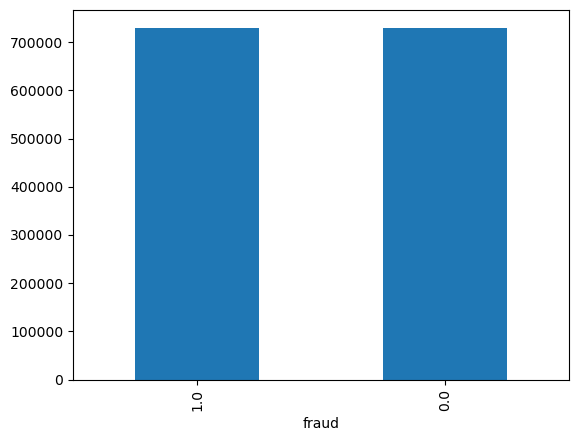

In [23]:
survived_plt = train_over["fraud"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

In [24]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [25]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [26]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/envs/env_lab/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [27]:
no_diabetes_undersampled = resample(no_fraude, 
                                    replace=False, 
                                    n_samples = len(fraude),
                                    random_state=0)
no_diabetes_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
755974,0.076421,-0.187631,-0.304873,0.366618,1.361704,-0.334593,-1.364472,0.0
352095,0.334048,-0.167739,0.756347,0.366618,-0.734374,-0.334593,0.732884,0.0
637362,-0.058604,-0.089674,-0.315683,0.366618,-0.734374,-0.334593,0.732884,0.0
84717,-0.327256,-0.114171,0.169628,0.366618,-0.734374,-0.334593,0.732884,0.0
749956,-0.302580,-0.149725,-0.551720,0.366618,1.361704,-0.334593,-1.364472,0.0
...,...,...,...,...,...,...,...,...
780934,-0.381563,-0.187984,-0.510614,-2.727632,-0.734374,-0.334593,-1.364472,0.0
626943,0.175616,-0.174186,-0.586453,0.366618,-0.734374,-0.334593,-1.364472,0.0
134043,-0.389086,0.059023,-0.202366,-2.727632,-0.734374,-0.334593,0.732884,0.0
142936,0.613742,0.041327,-0.576946,0.366618,1.361704,-0.334593,0.732884,0.0


In [28]:
train_under = pd.concat([no_diabetes_undersampled, fraude])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
755974,0.076421,-0.187631,-0.304873,0.366618,1.361704,-0.334593,-1.364472,0.0
352095,0.334048,-0.167739,0.756347,0.366618,-0.734374,-0.334593,0.732884,0.0
637362,-0.058604,-0.089674,-0.315683,0.366618,-0.734374,-0.334593,0.732884,0.0
84717,-0.327256,-0.114171,0.169628,0.366618,-0.734374,-0.334593,0.732884,0.0
749956,-0.302580,-0.149725,-0.551720,0.366618,1.361704,-0.334593,-1.364472,0.0
...,...,...,...,...,...,...,...,...
799964,1.897907,-0.102498,-0.069320,0.366618,-0.734374,-0.334593,0.732884,1.0
799972,-0.382112,-0.113786,1.799053,-2.727632,-0.734374,-0.334593,-1.364472,1.0
799984,0.194263,-0.186387,0.965774,0.366618,-0.734374,-0.334593,0.732884,1.0
799987,-0.191712,-0.185819,0.835812,0.366618,-0.734374,-0.334593,0.732884,1.0


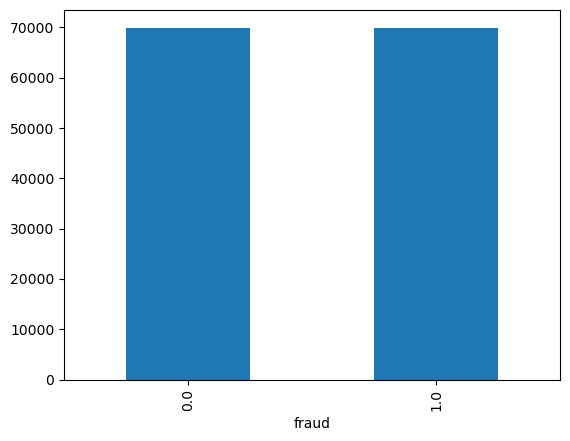

In [29]:
survived_plt = train_under["fraud"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

In [30]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [31]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [32]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/envs/env_lab/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [35]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [36]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [37]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

